In [1]:
import sys
path = '/Users/Everwitt/Documents/Pitch-Prediction/pitcherprediction'
sys.path.append(path)

In [2]:
import pandas as pd
import numpy as np

#importing path to obvious_zones allows us to import
from obvious_zones import *

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# These values are actually based on the universal strike zone values
RIGHT = 0.831
TOP = 1.074
obv_zones = ObviousZones(RIGHT, TOP)

In [4]:
print(obv_zones)

Cutoff Coordinates= > left_x: -0.831, right_x: 0.831top_y: 1.074, bot_y: -1.074


In [5]:
p = pd.read_csv('./obv_zone_cutoff.csv')

In [6]:
p['obv_zone'].value_counts()

12b    420117
15b    416363
13b    389123
16b    179081
10b    140269
14b     94646
9b      47673
11b     24377
Name: obv_zone, dtype: int64

In [7]:
p['pitch_type'].value_counts()

FF    560352
FT    335452
SL    322500
CH    225681
CU    168828
FC     98836
Name: pitch_type, dtype: int64

In [8]:
p.shape

(1711649, 16)

In [9]:
# For Each Pitch
ff = p.loc[p['pitch_type'] == 'FF']
ft = p.loc[p['pitch_type'] == 'FT']
fc = p.loc[p['pitch_type'] == 'FC']
sl = p.loc[p['pitch_type'] == 'SL']
ch = p.loc[p['pitch_type'] == 'CH']
cu = p.loc[p['pitch_type'] == 'CU']

# For Each Zone

# Swing/Take % -> We want like a heat map of sorts that is based on this pct

## FourSeam Fastball Zone Breakdowns

In [10]:
filt = ff['obv_zone'] == '9b'
z = ff.loc[filt, ['px', 'py', 'swing', 'obv_zone']]

<AxesSubplot:xlabel='px', ylabel='py'>

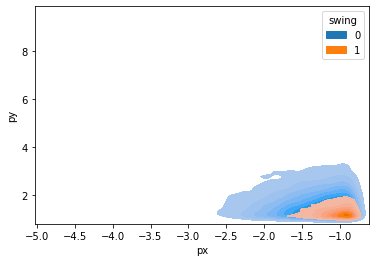

In [11]:
sns.kdeplot(
    data=z, x="px", y="py", hue="swing", fill=True,
)

In [12]:
# at every point I want df['swing'].sum()/df['swing'].count()
# what I would literally have to do is create my own density function - i increase px and py and then I calculate
# the density using the above equation, and then I would graph above based on that

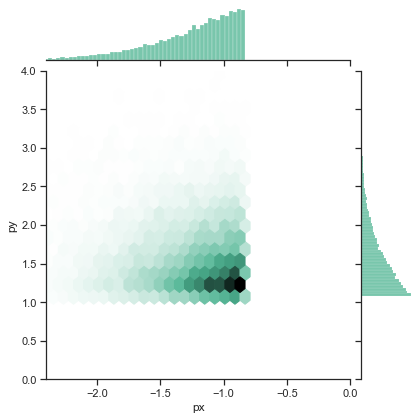

In [13]:
sns.set_theme(style="ticks")
plot = sns.jointplot(x=z['px'], y=z['py'], kind="hex", color="#4CB391")

xs = .6
ys = 1

plot.ax_marg_x.set_xlim(-4*xs, 0)
plot.ax_marg_y.set_ylim(0, 4)

plt.show()

In [48]:
# from original cleaning kaggle
x_arb = -1.2
y_arb = 1.4

# inside that square what is the %swing/take?
# filt = z['px'] < x_arb
filt = ((z['py'] < y_arb) & (z['px'] > x_arb))
zf = z.loc[filt]
znf = z.loc[~filt]

In [49]:
print(z.shape)
print(zf.shape)
print(znf.shape)

(25633, 4)
(6061, 4)
(19572, 4)


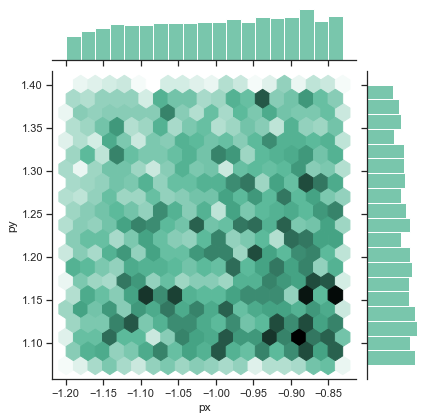

In [50]:
sns.set_theme(style="ticks")
plot = sns.jointplot(x=zf['px'], y=zf['py'], kind="hex", color="#4CB391")

# plot.ax_marg_x.set_xlim(-2, 0)
# plot.ax_marg_y.set_ylim(0, 2)

plt.show()

In [51]:
x_arb = [-0.831 - .09*x for x in range(6)]
y_arb = [1.074 + .1*x for x in range(6)]
x_arb.pop(0)
y_arb.pop(0)

1.074

In [52]:
print(z.shape)
for x,y in zip(x_arb, y_arb):
    filt = (z['py'] < y) & (z['px'] > x)
    zf = z.loc[filt, 'swing']
    znf = z.loc[~filt, 'swing']

    print(f"Coordinates: ({x,y})")
    print(f"Num Pitches in Ball Zone: {zf.shape[0]}")
    print(f"Num Pitches in Obv Zone: {znf.shape[0]}")
    
    print("Non-Obv Ball Zones")
    print(f"Num Swings: {zf.sum()}")
    print(f"Num Takes : {zf.count()-zf.sum()}")
    print(f"Swing%: {zf.sum()/zf.count()}")
    print(f"Take%: {1 - zf.sum()/zf.count()}")
    print()

(25633, 4)
Coordinates: ((-0.9209999999999999, 1.1740000000000002))
Num Pitches in Ball Zone: 638
Num Pitches in Obv Zone: 24995
Non-Obv Ball Zones
Num Swings: 207
Num Takes : 431
Swing%: 0.32445141065830724
Take%: 0.6755485893416928

Coordinates: ((-1.011, 1.274))
Num Pitches in Ball Zone: 2216
Num Pitches in Obv Zone: 23417
Non-Obv Ball Zones
Num Swings: 600
Num Takes : 1616
Swing%: 0.27075812274368233
Take%: 0.7292418772563176

Coordinates: ((-1.101, 1.374))
Num Pitches in Ball Zone: 4441
Num Pitches in Obv Zone: 21192
Non-Obv Ball Zones
Num Swings: 1006
Num Takes : 3435
Swing%: 0.22652555730691284
Take%: 0.7734744426930872

Coordinates: ((-1.1909999999999998, 1.4740000000000002))
Num Pitches in Ball Zone: 6987
Num Pitches in Obv Zone: 18646
Non-Obv Ball Zones
Num Swings: 1328
Num Takes : 5659
Swing%: 0.19006726778302563
Take%: 0.8099327322169744

Coordinates: ((-1.281, 1.574))
Num Pitches in Ball Zone: 9637
Num Pitches in Obv Zone: 15996
Non-Obv Ball Zones
Num Swings: 1575
Num Take

In [19]:
# look at min and max values of px py
z.describe()

,px,py,swing
count,25633.000000,25633.000000,25633.000000
mean,-1.277994,1.585997,0.078727
std,0.382277,0.461665,0.269317
min,-4.811587,1.074062,0.000000
25%,-1.468187,1.240896,0.000000
50%,-1.180000,1.457000,0.000000
75%,-0.990000,1.802000,0.000000
max,-0.831038,9.611000,1.000000


In [20]:
# max px and min py are correct... (this is actually a good way to check to make sure zones are working???)
# I mean in this entire zone we have 7.8% swing - which is actually fine, we are hoping to split this to get 
# two different zones, one with like 30+% swing

#i just do not understand how the last one can have less pitches in the non-obvious zone even though
#it has a bigger rectangle... the first is a subrectangle of the second but has more pitches!?!?

# I HAD THE > SIGN FLIPPED!!!

In [21]:
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y)
ellipse = xx * 2 + 4 * yy**2

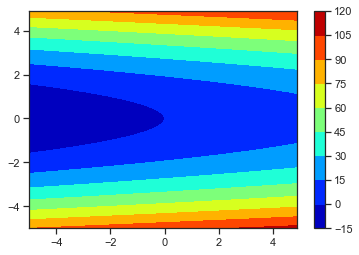

In [22]:
plt.contourf(xx, yy, ellipse, cmap = 'jet') 
plt.colorbar() 
plt.show() 

In [23]:
#now we have our coordinates but we need the density
# Create our own XX, and YY based on coordinates, at XX, YY the density is %swing
# so filt = (p['px'] < xx) & (p['py'] < yy) => z = p.loc[filt, 'swing'], density = z.sum()/z.count()

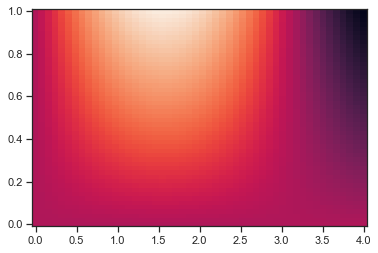

In [24]:
x = np.linspace(0,4)
y = np.linspace(0,1)

def f(x, y):
    return y * np.sin(x) 

X, Y = np.meshgrid(x,y)
Z = np.zeros((50,50))

for i in range(50):
    for j in range(50):
        Z[i,j] = f(X[i,j],Y[i,j])

plt.pcolor(X, Y, Z, shading='auto')
plt.show()

In [25]:
x = np.linspace(0,4)
x.shape

(50,)

In [26]:
y = np.linspace(0,1)
y.shape

(50,)

In [27]:
# so i could technically use linspace/arrange to get coords
# then I iterate through all those points to calculate density
# then i plot

In [54]:
#coords of 9b
x,y = -0.831,1.074

In [55]:
#should find a way to make these equal sizes... although I do not actually need that
xx = np.arange(x, -1.5, -.05)
yy = np.arange(y, 1.8, .055)

xx = np.delete(xx, 0)
yy = np.delete(yy, 0)

In [56]:
print(xx.shape)
print(yy.shape)

(13,)
(13,)


In [57]:
z.head()

,px,py,swing,obv_zone
92,-1.242,1.290,0,9b
129,-1.087,1.547,0,9b
434,-1.519,1.566,0,9b
490,-1.523,1.212,0,9b
552,-1.198,1.289,0,9b


In [58]:
def calc_swing_pct(x_r, y_r, df):
    swing_pct = np.zeros((x_r.shape[0],y_r.shape[0]))
    for i, vx in enumerate(x_r):
        for j, vy in enumerate(y_r):
            filt = (df['px'] > vx) & (df['py'] < vy)
            pitches = df.loc[filt]
            #i,j are coords, not vals
            swing_pct[i][j] = pitches['swing'].sum()/pitches['swing'].count()
            break
    return swing_pct
            
swing_pct = calc_swing_pct(xx, yy, z)

In [59]:
swing_pct.shape

(13, 13)

In [60]:
#why do we have so many 0 vals... this doesnt make sense?
swing_pct

array([[0.3592233 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.3592233 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.31866197, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.30727763, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.29608939, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.2776699 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.     

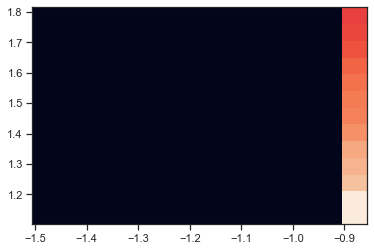

In [61]:
plt.pcolor(xx, yy, swing_pct, shading='auto')
plt.show()